<a href="https://colab.research.google.com/github/springboardmentor789r/AgriYield/blob/Intern_AnushikaRana/Infosysmilestone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.7 MB/s eta 0:00:00


In [2]:

# STEP 1: Import Libraries
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from category_encoders import LeaveOneOutEncoder

In [3]:
#STEP 2: Load Dataset
# ============================================================
file_path = "/content/crop_yield_dataset.csv"
df = pd.read_csv(file_path)

In [4]:
(df['Crop_Yield'] == 0).sum()

np.int64(11025)

In [5]:
print(df.columns)

Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')


In [6]:
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [7]:
df = df[df['Crop_Yield'] != 0]

In [8]:
# STEP 3: First Look at Dataset
# ============================================================
print("✅ First 5 rows:")
print(df.head())

✅ First 5 rows:
         Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
1  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424   
3  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000   
4  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000   
5  2014-01-01    Cotton     Sandy     6.75    14.826739  80.000000   
7  2014-01-01    Tomato      Clay     6.25    18.323272  80.000000   

   Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
1    8.591577  84.0  66.0  50.0  104.871310     66.666667  
3    2.682683  50.0  40.0  30.0   58.939796     35.000000  
4    7.696070  49.5  45.0  38.5   32.970413     22.166667  
5   10.366657  55.0  44.0  36.0   29.356115     39.375000  
7    8.198084  60.0  45.0  40.0   22.221375     42.291667  


In [9]:
df = df.reset_index(drop=True)

# Check the number of remaining rows
print("✅ Zero-yield rows dropped successfully!")
print("Remaining rows:", len(df))

✅ Zero-yield rows dropped successfully!
Remaining rows: 25495


In [10]:
print("\n✅ Dataset Info:")
print(df.info())


✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25495 entries, 0 to 25494
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          25495 non-null  object 
 1   Crop_Type     25495 non-null  object 
 2   Soil_Type     25495 non-null  object 
 3   Soil_pH       25495 non-null  float64
 4   Temperature   25495 non-null  float64
 5   Humidity      25495 non-null  float64
 6   Wind_Speed    25495 non-null  float64
 7   N             25495 non-null  float64
 8   P             25495 non-null  float64
 9   K             25495 non-null  float64
 10  Crop_Yield    25495 non-null  float64
 11  Soil_Quality  25495 non-null  float64
dtypes: float64(9), object(3)
memory usage: 2.3+ MB
None


In [12]:
# Drop categorical columns manually
categorical_cols = ['Crop_Type', 'Soil_Type']

df_numeric = df.drop(columns=categorical_cols)

print("Remaining columns:", df_numeric.columns.tolist())


Remaining columns: ['Date', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']


In [14]:
df_numeric.head()

,Date,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
1,2014-01-01,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
2,2014-01-01,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
3,2014-01-01,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
4,2014-01-01,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667


In [15]:
# Convert 'Date' column to datetime format if not already
df_numeric['Date'] = pd.to_datetime(df_numeric['Date'])

# Set 'Date' as the index
df_numeric.set_index('Date', inplace=True)

# Resample data per day and take the mean of all numeric columns
df_daily_mean = df_numeric.resample('D').mean()

# Display the first few rows
print(df_daily_mean.head())


             Soil_pH  Temperature   Humidity  Wind_Speed          N  \
Date                                                                  
2014-01-01  6.250000    17.832341  79.992489    7.649061  61.285714   
2014-01-02  6.928571    17.403738  79.997477    9.731096  67.285714   
2014-01-03  6.250000    17.710699  78.611669   12.161914  60.785714   
2014-01-04  7.125000    17.068594  79.349411    9.476664  69.375000   
2014-01-05  6.375000    15.439732  80.000000   10.793227  68.062500   

                    P          K  Crop_Yield  Soil_Quality  
Date                                                        
2014-01-01  50.142857  40.142857   52.962570     41.714286  
2014-01-02  54.500000  43.785714   49.481053     31.964286  
2014-01-03  49.571429  40.142857   31.582386     40.601190  
2014-01-04  56.000000  44.937500   35.247034     38.703125  
2014-01-05  54.562500  43.125000   32.578187     48.994792  


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Let's test for a specific column, e.g., 'Crop_Yield'
series = df_daily_mean['Crop_Yield'].dropna()


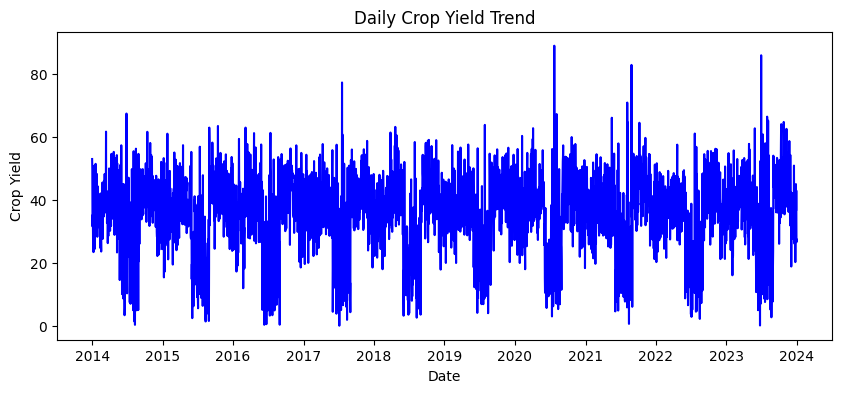

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Let's test for a specific column, e.g., 'Crop_Yield'
series = df_daily_mean['Crop_Yield'].dropna()

# ==============================
# 1️⃣ Plot the time series
# ==============================
plt.figure(figsize=(10,4))
plt.plot(series, color='blue')
plt.title('Daily Crop Yield Trend')
plt.xlabel('Date')
plt.ylabel('Crop Yield')
plt.show()







In [21]:
# ==============================
# 2️⃣ Augmented Dickey-Fuller (ADF) Test
# ==============================
adf_result = adfuller(series)
print("ADF Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")
if adf_result[1] < 0.05:
    print("✅ Series is Stationary (Reject H0)")
else:
    print("❌ Series is Non-Stationary (Fail to Reject H0)")

ADF Test:
ADF Statistic: -7.148107107405433
p-value: 3.193310854138931e-10
Critical Values: {'1%': np.float64(-3.4321632328202996), '5%': np.float64(-2.862341184885642), '10%': np.float64(-2.567196483328331)}
✅ Series is Stationary (Reject H0)


In [19]:
# 3️⃣ KPSS Test
# ==============================
kpss_result = kpss(series, regression='c', nlags='auto')
print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print(f"Critical Values: {kpss_result[3]}")
if kpss_result[1] < 0.05:
    print("❌ Series is Non-Stationary (Reject H0)")
else:
    print("✅ Series is Stationary (Fail to Reject H0)")



KPSS Test:
KPSS Statistic: 0.043423677627070334
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
✅ Series is Stationary (Fail to Reject H0)


/tmp/ipython-input-1784150439.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')


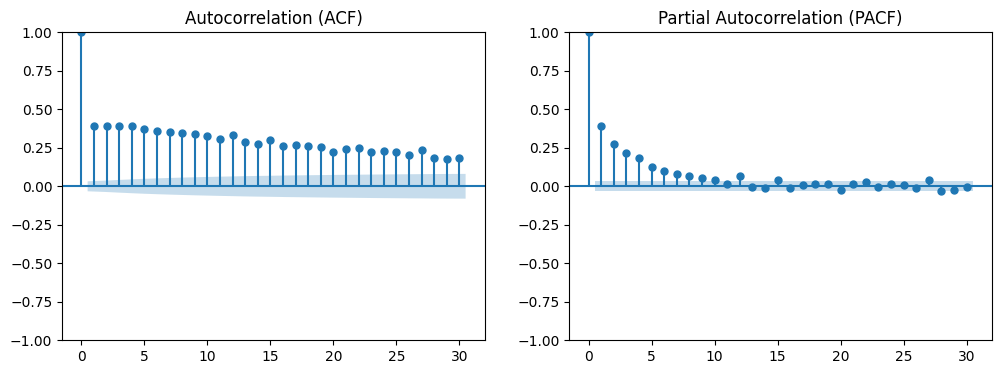

In [18]:
# 4️⃣ ACF and PACF Plots
# ==============================
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(series, lags=30, ax=axes[0])
plot_pacf(series, lags=30, ax=axes[1])
axes[0].set_title('Autocorrelation (ACF)')
axes[1].set_title('Partial Autocorrelation (PACF)')
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Crop_Yield   No. Observations:                 3624
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -13497.510
Date:                Fri, 31 Oct 2025   AIC                          27003.020
Time:                        13:28:00   BIC                          27027.801
Sample:                             0   HQIC                         27011.848
                               - 3624                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.7733      1.270     28.164      0.000      33.284      38.263
ar.L1          0.9752      0.004    226.470      0.000       0.967       0.984
ma.L1         -0.8275      0.010    -80.564      0.0

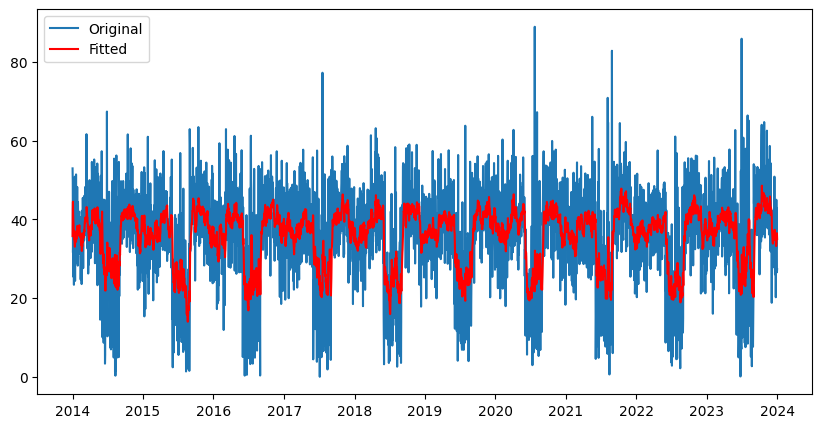

In [30]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model
model = ARIMA(series, order=(1, 0, 1))  # (p=1, d=0, q=1) as an example
model_fit = model.fit()

# Summary of model
print(model_fit.summary())

# Plot fitted vs actual
plt.figure(figsize=(10,5))
plt.plot(series, label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.show()


In [28]:
%pip install pmdarima --upgrade --no-deps